In [ ]:
!pip install pyreadr

In [ ]:
import pyreadr

# Read the RDS file
rds_path = "/content/data1.rds"
result = pyreadr.read_r(rds_path)

# Extract the DataFrame
df = next(iter(result.values()))

df


,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,ACREHOUS,PROPINSR,...,AGE,BIRTHYR,WKSWORK2,INCTOT,FTOTINC,SEI,ERSCOR50,NPBOSS50,RIDERS,TRANTIME
0,2021,202101,1.0,2.021010e+12,13.0,2.021000e+12,80001.0,3,0,0.0,...,85,1936.0,0,15000.0,9999999.0,0,9999,9999,0,0.0
1,2021,202101,2.0,2.021010e+12,51.0,2.021000e+12,80001.0,3,0,0.0,...,67,1954.0,0,4800.0,9999999.0,0,9999,9999,0,0.0
2,2021,202101,3.0,2.021010e+12,17.0,2.021000e+12,120001.0,3,0,0.0,...,74,1947.0,0,36000.0,9999999.0,0,9999,9999,0,0.0
3,2021,202101,4.0,2.021010e+12,61.0,2.021000e+12,170001.0,3,0,0.0,...,16,2005.0,0,0.0,9999999.0,0,9999,9999,0,0.0
4,2021,202101,5.0,2.021010e+12,15.0,2.021000e+12,50001.0,3,0,0.0,...,83,1938.0,0,7200.0,9999999.0,0,9999,9999,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10031781,2023,202301,1519008.0,2.023001e+12,77.0,2.023015e+12,30056.0,1,1,1800.0,...,53,1970.0,6,80000.0,145000.0,72,586,789,1,15.0
10031782,2023,202301,1519008.0,2.023001e+12,77.0,2.023015e+12,30056.0,1,1,1800.0,...,66,1957.0,0,65000.0,145000.0,72,586,789,0,0.0
10031783,2023,202301,1519009.0,2.023001e+12,75.0,2.023015e+12,20056.0,1,1,1200.0,...,63,1960.0,6,75000.0,75000.0,80,844,933,1,6.0
10031784,2023,202301,1519010.0,2.023001e+12,37.0,2.023015e+12,10056.0,1,0,0.0,...,63,1960.0,0,23000.0,43600.0,0,9999,9999,0,0.0


In [ ]:
print(df.dtypes)


YEAR          int32
SAMPLE        int32
SERIAL      float64
CBSERIAL    float64
HHWT        float64
CLUSTER     float64
STRATA      float64
GQ            int32
ACREHOUS      int32
PROPINSR    float64
PROPTX99      int32
RENTGRS       int32
COSTELEC    float64
COSTGAS     float64
COSTWATR    float64
COSTFUEL    float64
VALUEH        int32
UNITSSTR      int32
BEDROOMS      int32
NFAMS         int32
NCOUPLES      int32
NMOTHERS      int32
NFATHERS      int32
PERNUM      float64
PERWT       float64
FAMSIZE       int32
NCHILD        int32
NSIBS         int32
AGE           int32
BIRTHYR     float64
WKSWORK2      int32
INCTOT      float64
FTOTINC     float64
SEI           int32
ERSCOR50      int32
NPBOSS50      int32
RIDERS        int32
TRANTIME    float64
dtype: object


In [ ]:
drop_cols = ['SERIAL', 'CBSERIAL', 'PERNUM', 'CLUSTER', 'STRATA', 'SAMPLE', 'YEAR']
df_pca = df.drop(columns=drop_cols)
df_pca

,HHWT,GQ,ACREHOUS,PROPINSR,PROPTX99,RENTGRS,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,...,AGE,BIRTHYR,WKSWORK2,INCTOT,FTOTINC,SEI,ERSCOR50,NPBOSS50,RIDERS,TRANTIME
0,13.0,3,0,0.0,0,0,0.0,0.0,0.0,0.0,...,85,1936.0,0,15000.0,9999999.0,0,9999,9999,0,0.0
1,51.0,3,0,0.0,0,0,0.0,0.0,0.0,0.0,...,67,1954.0,0,4800.0,9999999.0,0,9999,9999,0,0.0
2,17.0,3,0,0.0,0,0,0.0,0.0,0.0,0.0,...,74,1947.0,0,36000.0,9999999.0,0,9999,9999,0,0.0
3,61.0,3,0,0.0,0,0,0.0,0.0,0.0,0.0,...,16,2005.0,0,0.0,9999999.0,0,9999,9999,0,0.0
4,15.0,3,0,0.0,0,0,0.0,0.0,0.0,0.0,...,83,1938.0,0,7200.0,9999999.0,0,9999,9999,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10031781,77.0,1,1,1800.0,30,0,1920.0,1440.0,120.0,9993.0,...,53,1970.0,6,80000.0,145000.0,72,586,789,1,15.0
10031782,77.0,1,1,1800.0,30,0,1920.0,1440.0,120.0,9993.0,...,66,1957.0,0,65000.0,145000.0,72,586,789,0,0.0
10031783,75.0,1,1,1200.0,24,0,480.0,1800.0,1000.0,9993.0,...,63,1960.0,6,75000.0,75000.0,80,844,933,1,6.0
10031784,37.0,1,0,0.0,0,500,600.0,9993.0,9993.0,9993.0,...,63,1960.0,0,23000.0,43600.0,0,9999,9999,0,0.0


In [ ]:
pretty_names = {
    'HHWT': 'Household Weight',
    'GQ': 'Group Quarters Type',
    'ACREHOUS': 'House Acreage',
    'PROPINSR': 'Annual Property Insurance ($)',
    'PROPTX99': 'Annual Property Tax (1990 scale)',
    'RENTGRS': 'Monthly Gross Rent ($)',
    'COSTELEC': 'Annual Electricity Cost ($)',
    'COSTGAS': 'Annual Gas Cost ($)',
    'COSTWATR': 'Annual Water Cost ($)',
    'COSTFUEL': 'Annual Heating Fuel Cost ($)',
    'VALUEH': 'House Value ($)',
    'UNITSSTR': 'Units in Structure',
    'BEDROOMS': 'Number of Bedrooms',
    'NFAMS': 'Number of Families in Household',
    'NCOUPLES': 'Number of Couples in Household',
    'NMOTHERS': 'Number of Mothers in Household',
    'NFATHERS': 'Number of Fathers in Household',
    'PERWT': 'Person Weight',
    'FAMSIZE': 'Family Size',
    'NCHILD': 'Number of Children',
    'NSIBS': 'Number of Siblings',
    'AGE': 'Age',
    'BIRTHYR': 'Birth Year',
    'WKSWORK2': 'Weeks Worked Last Year (intervalled)',
    'INCTOT': 'Total Personal Income ($)',
    'FTOTINC': 'Total Family Income ($)',
    'SEI': 'Socioeconomic Index (SEI)',
    'ERSCOR50': 'Occupational Earnings Score (1950 basis)',
    'NPBOSS50': 'Occupational Status Score (1950 basis)',
    'RIDERS': 'Vehicle Occupancy',
    'TRANTIME': 'Commute Time to Work (minutes)'
}


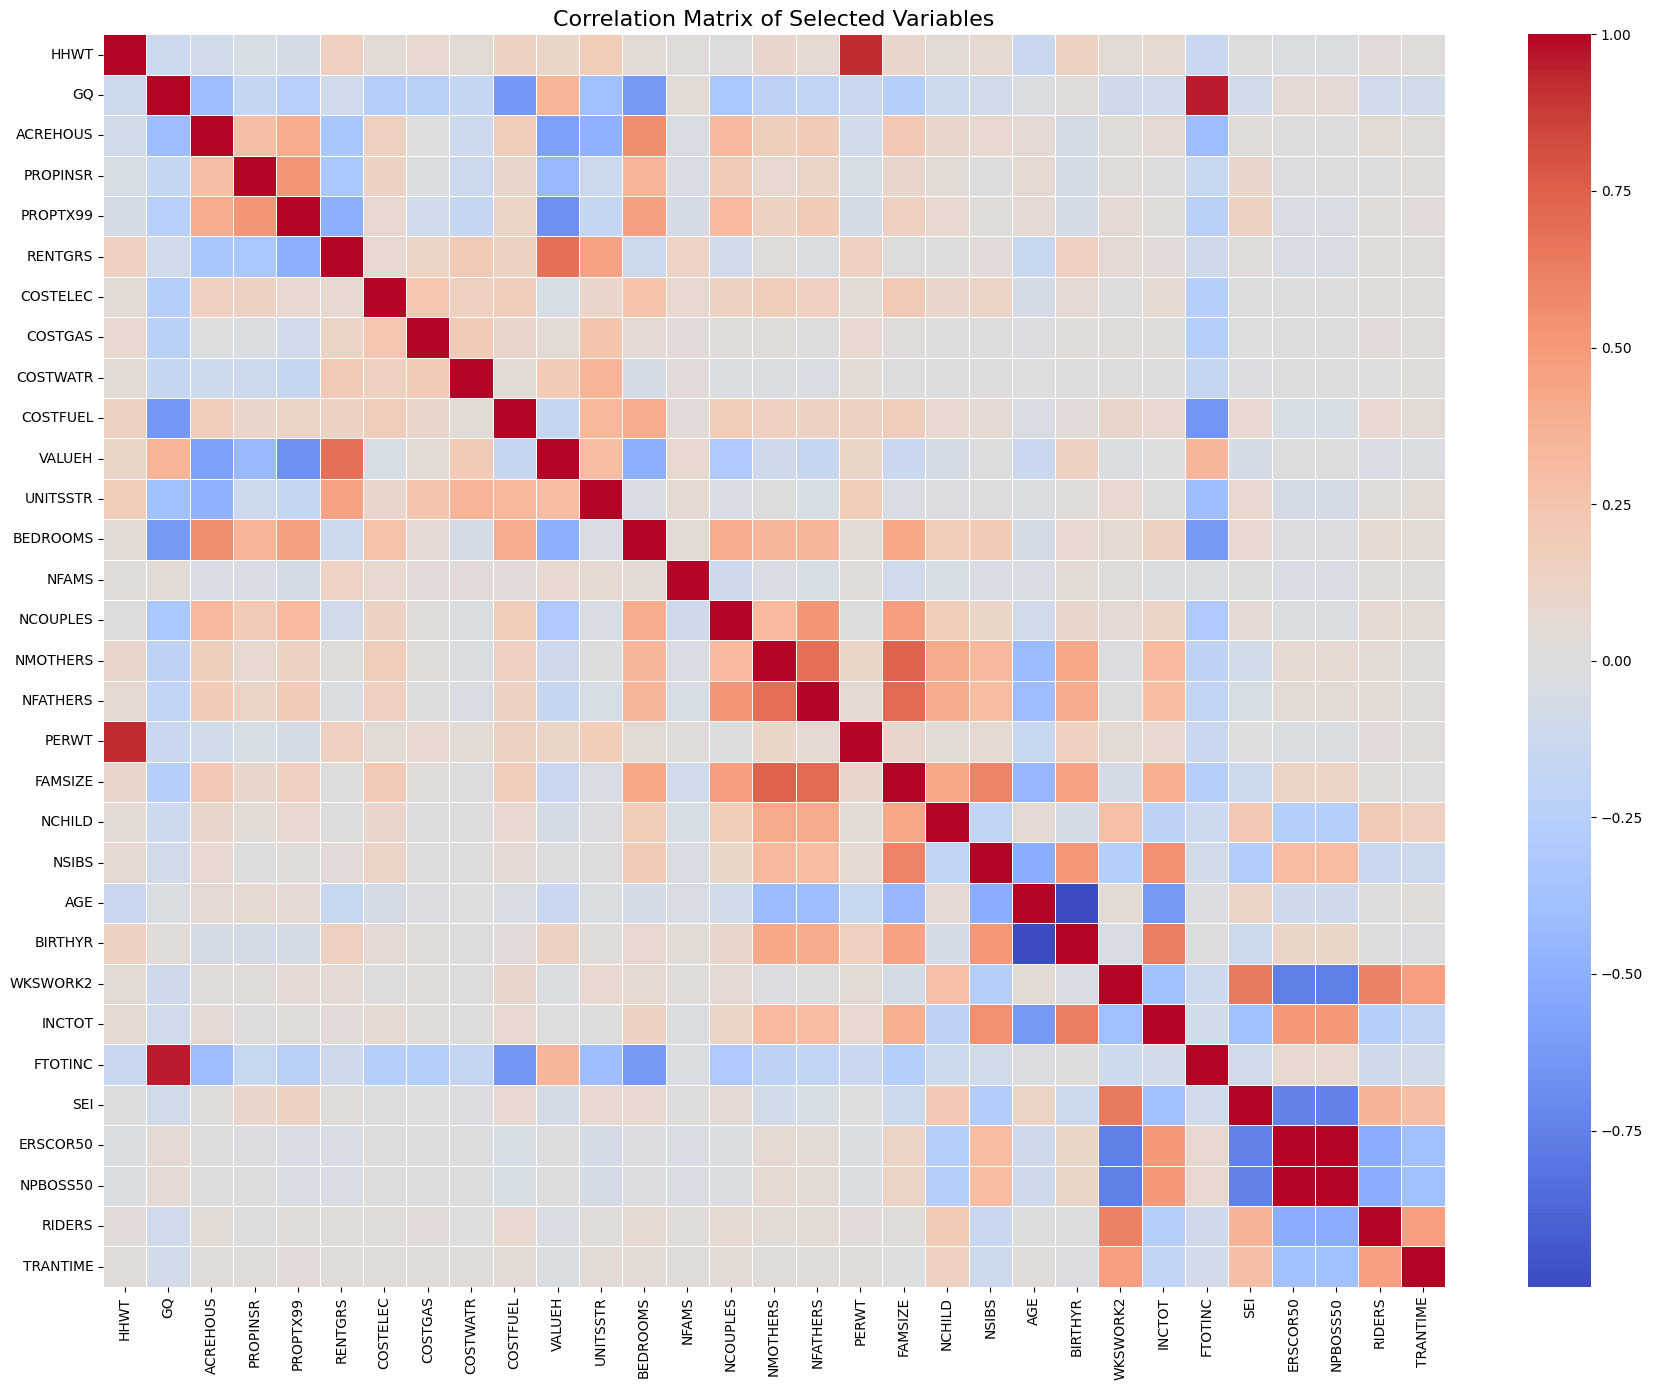

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame with relevant columns
columns_to_use = [
    'HHWT', 'GQ', 'ACREHOUS', 'PROPINSR', 'PROPTX99', 'RENTGRS', 'COSTELEC',
    'COSTGAS', 'COSTWATR', 'COSTFUEL', 'VALUEH', 'UNITSSTR', 'BEDROOMS',
    'NFAMS', 'NCOUPLES', 'NMOTHERS', 'NFATHERS', 'PERWT', 'FAMSIZE',
    'NCHILD', 'NSIBS', 'AGE', 'BIRTHYR', 'WKSWORK2', 'INCTOT', 'FTOTINC',
    'SEI', 'ERSCOR50', 'NPBOSS50', 'RIDERS', 'TRANTIME'
]

# Compute the correlation matrix
corr_matrix = df[columns_to_use].corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,ACREHOUS,PROPINSR,...,AGE,BIRTHYR,WKSWORK2,INCTOT,FTOTINC,SEI,ERSCOR50,NPBOSS50,RIDERS,TRANTIME
0,2021,202101,1.0,2.021010e+12,13.0,2.021000e+12,80001.0,3,0,0.0,...,85,1936.0,0,15000.0,9999999.0,0,9999,9999,0,0.0
1,2021,202101,2.0,2.021010e+12,51.0,2.021000e+12,80001.0,3,0,0.0,...,67,1954.0,0,4800.0,9999999.0,0,9999,9999,0,0.0
2,2021,202101,3.0,2.021010e+12,17.0,2.021000e+12,120001.0,3,0,0.0,...,74,1947.0,0,36000.0,9999999.0,0,9999,9999,0,0.0
3,2021,202101,4.0,2.021010e+12,61.0,2.021000e+12,170001.0,3,0,0.0,...,16,2005.0,0,0.0,9999999.0,0,9999,9999,0,0.0
4,2021,202101,5.0,2.021010e+12,15.0,2.021000e+12,50001.0,3,0,0.0,...,83,1938.0,0,7200.0,9999999.0,0,9999,9999,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10031781,2023,202301,1519008.0,2.023001e+12,77.0,2.023015e+12,30056.0,1,1,1800.0,...,53,1970.0,6,80000.0,145000.0,72,586,789,1,15.0
10031782,2023,202301,1519008.0,2.023001e+12,77.0,2.023015e+12,30056.0,1,1,1800.0,...,66,1957.0,0,65000.0,145000.0,72,586,789,0,0.0
10031783,2023,202301,1519009.0,2.023001e+12,75.0,2.023015e+12,20056.0,1,1,1200.0,...,63,1960.0,6,75000.0,75000.0,80,844,933,1,6.0
10031784,2023,202301,1519010.0,2.023001e+12,37.0,2.023015e+12,10056.0,1,0,0.0,...,63,1960.0,0,23000.0,43600.0,0,9999,9999,0,0.0


In [ ]:
df_subset = df[
    (df['YEAR'] == 2023) &
    (df['AGE'].between(20, 30)) &
    (df['RENTGRS'] > 0) &
    (df['BEDROOMS'] >= 2) &
    (df['INCTOT'] > 40000)
]
df_subset

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,ACREHOUS,PROPINSR,...,AGE,BIRTHYR,WKSWORK2,INCTOT,FTOTINC,SEI,ERSCOR50,NPBOSS50,RIDERS,TRANTIME
6629702,2023,202301,3715.0,2.023000e+12,88.0,2.023000e+12,220101.0,1,1,0.0,...,29,1994.0,6,110000.0,110000.0,68,792,798,1,12.0
6629820,2023,202301,3764.0,2.023000e+12,89.0,2.023000e+12,10001.0,1,1,0.0,...,27,1996.0,6,70000.0,104800.0,15,428,369,1,30.0
6629856,2023,202301,3777.0,2.023000e+12,139.0,2.023000e+12,140301.0,1,0,0.0,...,30,1993.0,6,61000.0,61000.0,84,792,850,0,25.0
6629857,2023,202301,3778.0,2.023000e+12,48.0,2.023000e+12,180101.0,1,0,0.0,...,26,1997.0,6,50000.0,50000.0,87,996,948,1,15.0
6629858,2023,202301,3779.0,2.023000e+12,117.0,2.023000e+12,120201.0,1,0,0.0,...,26,1997.0,6,55000.0,55000.0,68,792,798,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10031475,2023,202301,1518882.0,2.023001e+12,259.0,2.023015e+12,10056.0,1,1,0.0,...,30,1993.0,5,47200.0,47200.0,16,98,193,1,8.0
10031477,2023,202301,1518882.0,2.023001e+12,259.0,2.023015e+12,10056.0,1,1,0.0,...,27,1996.0,6,75000.0,75000.0,68,792,798,1,8.0
10031540,2023,202301,1518911.0,2.023001e+12,251.0,2.023015e+12,30056.0,1,0,0.0,...,20,2003.0,6,100000.0,100000.0,52,251,296,1,10.0
10031574,2023,202301,1518924.0,2.023001e+12,66.0,2.023015e+12,50056.0,1,0,0.0,...,27,1996.0,3,451000.0,481000.0,8,219,178,0,0.0


| **Category**             | **Variable** | **Description / Example Criteria**                                 |
|--------------------------|--------------|---------------------------------------------------------------------|
| **Demographic / Temporal** | YEAR        | Year of data collection (e.g., `YEAR == 2023`)                      |
|                          | AGE          | Person's age (e.g., `AGE >= 20 & AGE <= 30`)                                                  |
| **Household & Housing**    | RENTGRS      | Monthly rent including utilities (e.g., `RENTGRS > 0`)          |
|                          | BEDROOMS     | Number of bedrooms (e.g., `BEDROOMS >= 2`)                          
| **Economic**              | INCTOT       | Total personal income (e.g., `INCTOT > 40000`)                      |


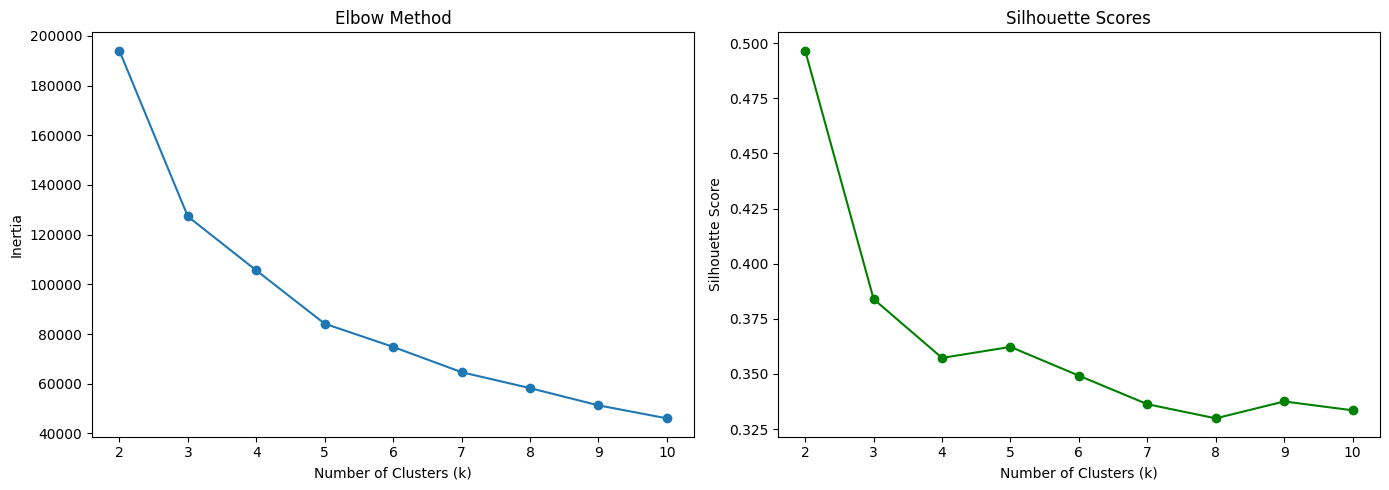

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
#  Clean and scale the data
df_clean = df_subset[columns_to_use].dropna()
scaled = StandardScaler().fit_transform(df_clean)

# Optional PCA before clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Test different k values and record inertia and silhouette scores
inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(pca_result, labels))

# Plot the Elbow and Silhouette Score graphs
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
ax[0].plot(k_range, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')

# Silhouette Score
ax[1].plot(k_range, silhouette, marker='o', color='green')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
pca_result = pca.fit_transform(scaled)
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(pca_result)
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(pca_result)


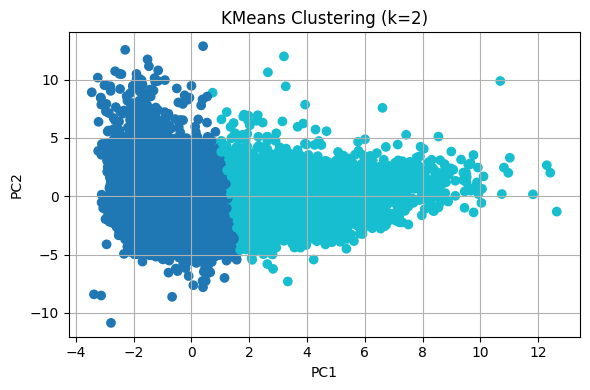

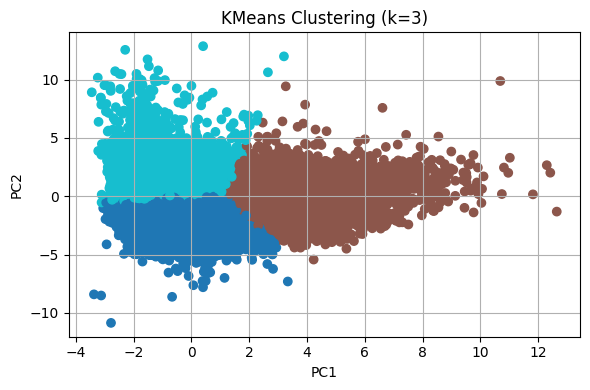

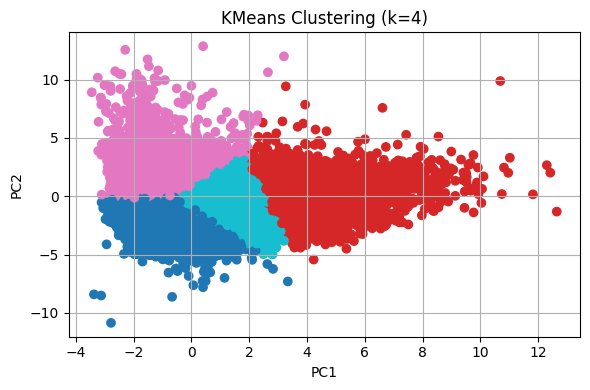

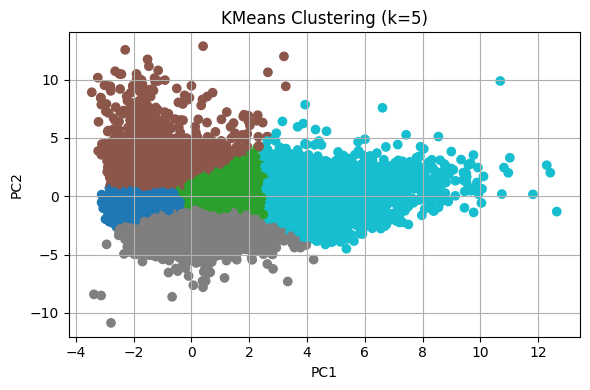

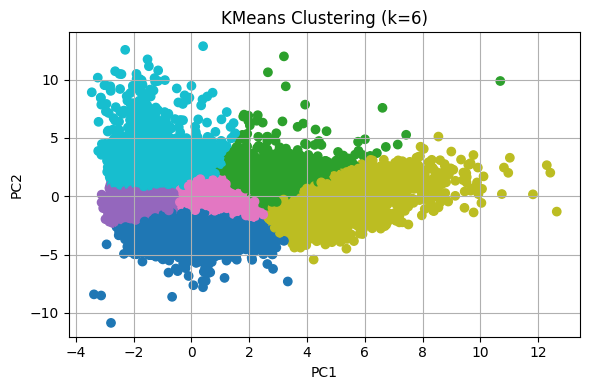

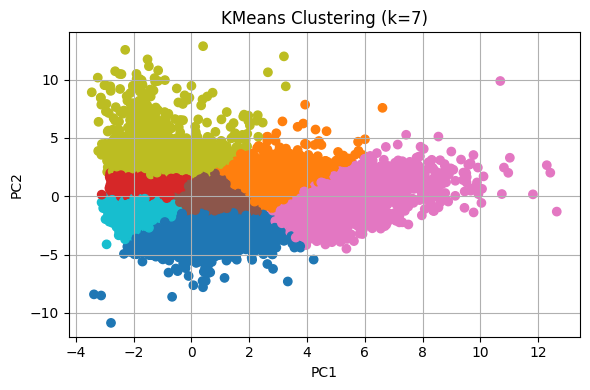

In [ ]:
for k in [2,3,4,5,6,7]:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_result)
    plt.figure(figsize=(6, 4))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='tab10')
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd  # Ensure pandas is imported

pca_components = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=columns_to_use  # original feature names
)

# Display
print("🔹 Top features contributing to PC1 and PC2:")
print(pca_components)




🔹 Top features contributing to PC1 and PC2:
                   PC1           PC2
HHWT     -2.895893e-02 -8.705177e-02
GQ       -9.510579e-04 -8.940404e-02
ACREHOUS  2.868030e-01 -1.389914e-01
PROPINSR -0.000000e+00 -5.551115e-17
PROPTX99  2.775558e-17  1.665335e-16
RENTGRS  -7.293327e-02  1.440660e-01
COSTELEC  1.200653e-01 -9.161741e-02
COSTGAS  -5.962707e-02 -3.209192e-02
COSTWATR -5.509079e-02  1.835408e-02
COSTFUEL -5.562556e-02  1.535326e-02
VALUEH   -1.694066e-21 -3.469447e-18
UNITSSTR -2.948948e-01  1.624192e-01
BEDROOMS  2.532117e-01 -1.407868e-01
NFAMS    -7.857764e-02 -2.270820e-01
NCOUPLES  2.258323e-01  2.108299e-01
NMOTHERS  3.914625e-01  4.773975e-02
NFATHERS  3.893031e-01  6.554907e-02
PERWT    -2.558351e-02 -8.547937e-02
FAMSIZE   4.188793e-01  1.269627e-01
NCHILD    3.310369e-01  7.576925e-02
NSIBS     1.787321e-01 -1.118345e-02
AGE       3.215097e-02  4.348356e-01
BIRTHYR  -3.215097e-02 -4.348356e-01
WKSWORK2  1.932453e-02  3.445257e-02
INCTOT   -7.652240e-02  3.34306

In [ ]:
# Top 10 contributors to PC1
top_pc1 = pca_components['PC1'].sort_values(key=abs, ascending=False).head(10)
print("🔹 Top 10 Feature Contributions to PC1 (→ indicates direction):\n")
for feature, loading in top_pc1.items():
    direction = "+" if loading > 0 else "-"
    print(f"{feature:15} {direction} {abs(loading):.4f}")

# Top 10 contributors to PC2
top_pc2 = pca_components['PC2'].sort_values(key=abs, ascending=False).head(10)
print("\n🔹 Top 10 Feature Contributions to PC2 (→ indicates direction):\n")
for feature, loading in top_pc2.items():
    direction = "+" if loading > 0 else "-"
    print(f"{feature:15} {direction} {abs(loading):.4f}")


🔹 Top 10 Feature Contributions to PC1 (→ indicates direction):

FAMSIZE         + 0.4189
NMOTHERS        + 0.3915
NFATHERS        + 0.3893
NCHILD          + 0.3310
UNITSSTR        - 0.2949
ACREHOUS        + 0.2868
BEDROOMS        + 0.2532
NCOUPLES        + 0.2258
NSIBS           + 0.1787
SEI             - 0.1759

🔹 Top 10 Feature Contributions to PC2 (→ indicates direction):

AGE             + 0.4348
BIRTHYR         - 0.4348
FTOTINC         + 0.3952
INCTOT          + 0.3343
NFAMS           - 0.2271
SEI             + 0.2163
NCOUPLES        + 0.2108
UNITSSTR        + 0.1624
ERSCOR50        - 0.1460
NPBOSS50        - 0.1444


PC1 primarily represents family structure and living arrangements. High positive loadings on variables like FAMSIZE, NMOTHERS, NFATHERS, NCHILD, BEDROOMS, and NCOUPLES indicate larger, multigenerational households with more children and couples. In contrast, negative contributions from UNITSSTR (units in structure) and SEI (socioeconomic index) suggest smaller living spaces such as apartments, typically associated with lower-income housing. Thus, PC1 effectively separates larger family households from smaller or individual-based households, especially those in compact, multi-unit dwellings.

PC2 reflects differences in age and economic status. Positive loadings on AGE and income-related variables (FTOTINC, INCTOT, SEI) and a negative loading on BIRTHYR confirm that PC2 increases with older age and greater financial stability. Meanwhile, the negative contribution of NFAMS (number of family units) suggests simpler or single-family households. Overall, PC2 distinguishes older, wealthier individuals from younger renters who may have less income and live in more complex household structures.

Cluster A:

Large Family Households
This group scores high on PC1, indicating larger family sizes with multiple adults and children living together. These individuals are likely to reside in houses rather than apartment complexes, suggesting access to more spacious living arrangements. While their exact income levels may vary, their household structure hints at possible moderate income levels shared among earners. This cluster likely represents family households in suburban areas, possibly engaging in shared living to manage costs or support multigenerational living.

Cluster B:

Older, Wealthier Individuals
High values on PC2 characterize this group, typically older individuals with higher income and socioeconomic status. These individuals often live alone or in smaller households, with fewer children and simpler family compositions. Their lifestyle and economic profile suggest stability and independence. This cluster may represent older professionals or high-income renters who prefer quieter, low-density living environments and have more financial flexibility.

Cluster C:

Young, Low-Income Renters
This group falls low on both PC1 and PC2, pointing to smaller household sizes, lower income levels, and denser housing arrangements like apartments. These individuals may include students, early-career professionals, or single renters navigating housing in urban areas. Their economic constraints and living environments reflect a younger demographic, likely facing affordability challenges or transient living situations.

✅ Summary in Simple Terms:


| Cluster Color | Region on Plot               | Who They Are                                | Label     |
| ------------- | ---------------------------- | ------------------------------------------- | --------- |
| 🟫 Brown      | Far right (High PC1)         | Large families, more children, multi-person | Cluster A |
| 🟦 Blue       | Bottom left (Low PC1 & PC2)  | Young, lower-income, likely renters         | Cluster C |
| 🟦 Cyan       | Top left (Low PC1, High PC2) | Wealthier, older, small households          | Cluster B |



## **Hierarchical Clustering**

Due to the complexity of hierarchical clustering, a subset of 2000 randomly sampled data points from the full dataset (51,000 rows) are generated to allow for computation and visualization of dendrograms. This still provides insight into structure and linkage quality.

In [ ]:
# Packages
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

import numpy as np

In [ ]:
# Select 2000 random data points
np.random.seed(42)
sample_indices = np.random.choice(scaled.shape[0], size=2000, replace=False)
sample_data = scaled[sample_indices, :]

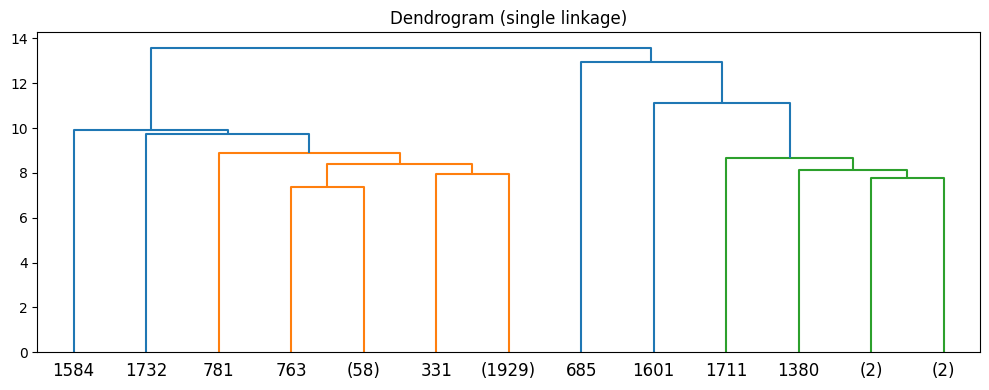

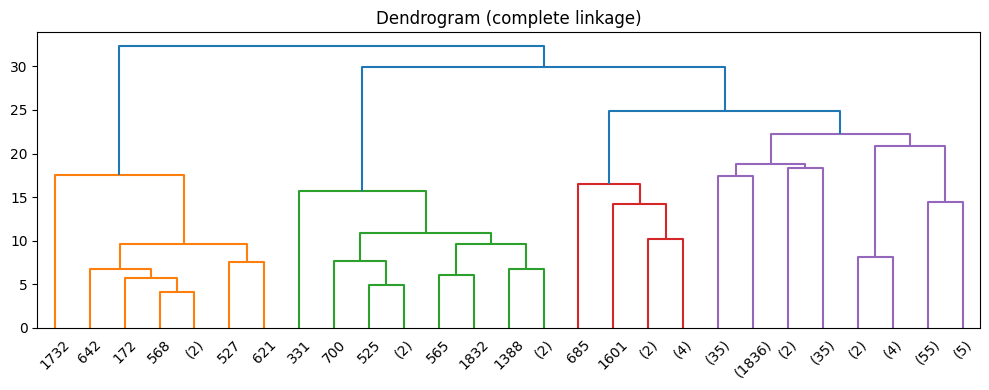

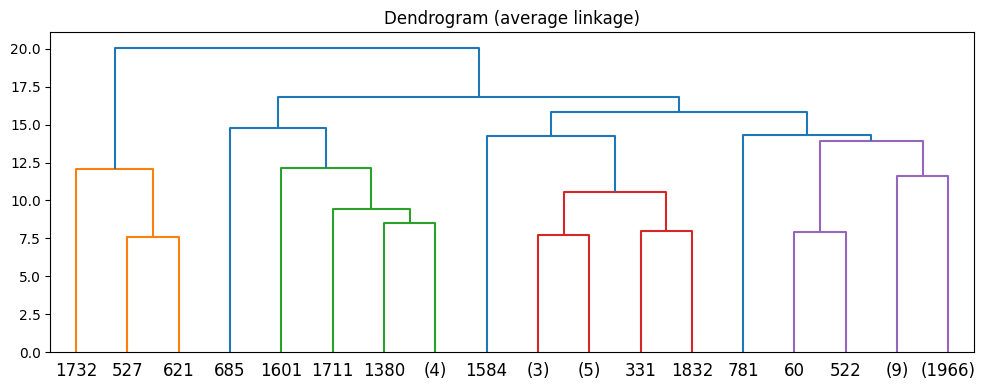

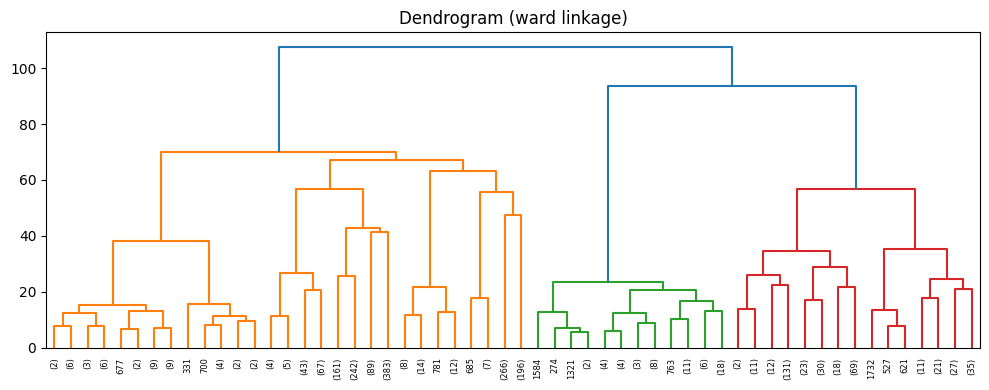

In [ ]:
# Try multiple linkage types
linkages = ['single', 'complete', 'average', 'ward']

for method in linkages:
    plt.figure(figsize=(10, 4))
    Z = linkage(sample_data, method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.tight_layout()
    plt.show()

**Observation**:

Average linkage has the highest sillhouette score of 0.5863, indicating the best overall structure among the four linkage types. Ward, although popular, did not perform well with this data.

In [ ]:
sil_scores = {}

for method in linkages:
    Z = linkage(sample_data, method=method)
    labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(sample_data, labels)
    sil_scores[method] = score

for method, score in sil_scores.items():
    print(f'Silhouette Score for {method} linkage: {score:.4f}')


Silhouette Score for single linkage: 0.5797
Silhouette Score for complete linkage: 0.5217
Silhouette Score for average linkage: 0.5863
Silhouette Score for ward linkage: 0.2052


Linkage: single


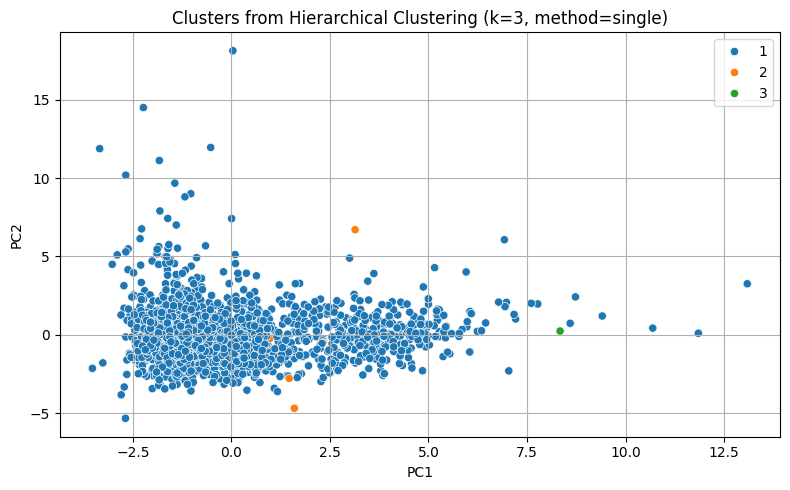

Linkage: complete


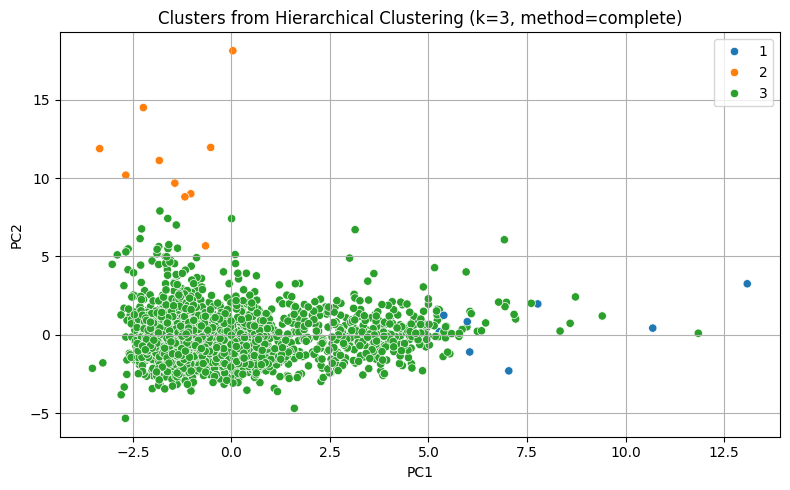

Linkage: average


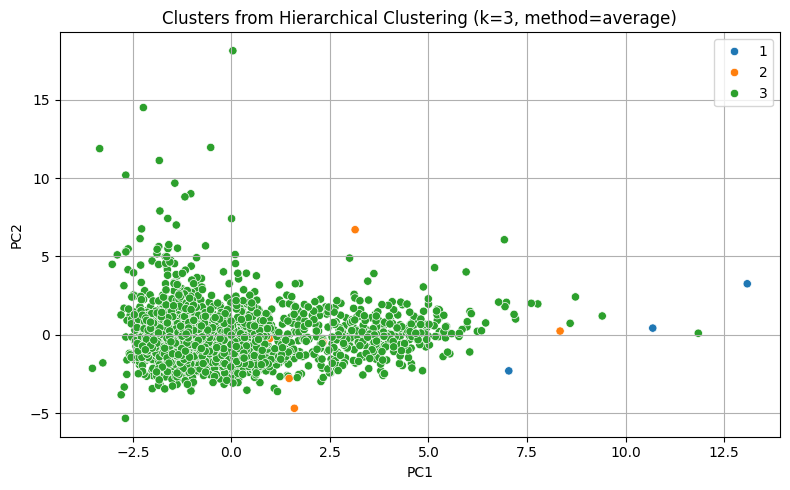

Linkage: ward


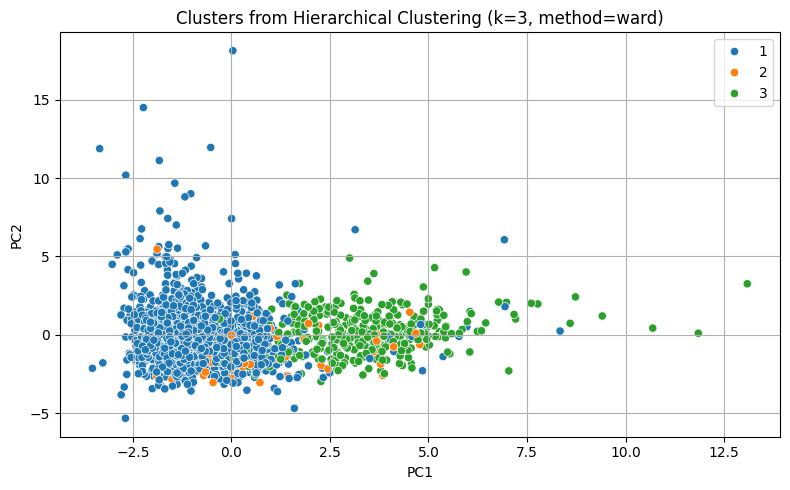

In [ ]:
# Slicing

from scipy.cluster.hierarchy import fcluster

k = 3

for method in linkages:
    print(f'Linkage: {method}')
    Z = linkage(sample_data, method=method)

    labels = fcluster(Z, k, criterion='maxclust')

    # Visualize clusters
    pca_vis = PCA(n_components=2).fit_transform(sample_data)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pca_vis[:, 0], y=pca_vis[:, 1], hue=labels, palette='tab10')
    plt.title(f'Clusters from Hierarchical Clustering (k={k}, method={method})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**Observation**:

In average linkage, cluster 3 dominates almost everything. This suggest that most of the sampled data is being grouped into a single cluster. This defeats the purpose of clustering. Cluster 1 and 2 are small and scattered, indicating outliers and not genuine clusters. The slicing threshold might be too high, or the dendrogram had no strong splits beyond the main blob.

Despite the *high sillhouette score*, the average plot reveals that the model is over-generalizing by placing everything into one large cluster. Other points in teh clusters might have large linkage distances from the main group (noise or outliers!).

Therefore, *k-means clustering* is the better fit for this data.

## **Iterative Matrix Completion**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df_matrix_comp = scaled.copy()

np.random.seed(0)
n_missing = 1000
rand_rows = np.random.choice(df_matrix_comp.shape[0], n_missing)
rand_cols = np.random.choice(df_matrix_comp.shape[1], n_missing)
df_matrix_comp[rand_rows, rand_cols] = np.nan

col_means = np.nanmean(df_matrix_comp, axis=0)

# Create initial filled matrix
Xhat = df_matrix_comp.copy()
missing_mask = np.isnan(Xhat)
Xhat[missing_mask] = np.take(col_means, np.where(missing_mask)[1])

def fit_svd(X, M=5):
    U, s, V = np.linalg.svd(X, full_matrices=False)
    return U[:, :M] @ (np.diag(s[:M]) @ V[:M, :])


thresh = 1e-7
rel_err = 1
iter_ = 0
M = 5  # Number of principal components

Xna = df_matrix_comp
mss0 = np.mean(np.square(Xna[~missing_mask]))
mssold = mss0

while rel_err > thresh:
    iter_ += 1
    Xapp = fit_svd(Xhat, M=M)
    Xhat[missing_mask] = Xapp[missing_mask]
    mss = np.mean(np.square(Xna[~missing_mask] - Xapp[~missing_mask]))
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print(f"Iteration {iter_}: MSS = {mss:.6f}, Rel. Err = {rel_err:.6e}")

Xtrue = scaled
print("Correlation on imputed values:", np.corrcoef(Xapp[missing_mask], Xtrue[missing_mask])[0, 1])

Iteration 1: MSS = 0.484041, Rel. Err = 4.640476e-01
Iteration 2: MSS = 0.483991, Rel. Err = 5.582803e-05
Iteration 3: MSS = 0.483984, Rel. Err = 7.283264e-06
Iteration 4: MSS = 0.483983, Rel. Err = 1.344908e-06
Iteration 5: MSS = 0.483983, Rel. Err = 2.727519e-07
Iteration 6: MSS = 0.483983, Rel. Err = 5.660008e-08
Correlation on imputed values: 0.6090831441470764


Using PCA-based matrix completion, the algorithm converged after 6 iterations, with the mean squared error stabilizing at 0.484. The relative error dropped below the convergence threshold (1e-7), indicating stable reconstruction. The correlation between the imputed and true values was approximately 0.61, suggesting a moderately strong alignment between the estimated and actual values.